# TRABAJO FINAL DE GRADO - PEC 2
###### Autor: Claudia Reina Fajardo
###### Octubre 2021

## Visualización de datos

In [24]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# cargamos el dataset creado
df = pd.read_csv('dataVis.csv')

### Visualización estadísticos básicos

Para empezar, obtendremos los estadísticos básicos de aquellas variables numéricas, para su posterior análisis.

In [3]:
df.describe()

,SEQN,exam,age,numPeopleHouse,numToddler,numChildren,numOlder,poverty,tvHours,pcHours
count,5000.000000,5000.0,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,78661.687400,2.0,47.376000,3.256200,0.27740,0.552000,0.592200,2.482350,2.463600,1.101000
std,2914.135784,0.0,18.483911,1.698923,0.60739,0.947774,0.801516,1.647215,1.642563,1.503214
min,73557.000000,2.0,18.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76177.000000,2.0,32.000000,2.000000,0.00000,0.000000,0.000000,1.040000,1.000000,0.000000
50%,78680.500000,2.0,47.000000,3.000000,0.00000,0.000000,0.000000,2.090000,2.000000,0.000000
75%,81139.500000,2.0,63.000000,4.000000,0.00000,1.000000,1.000000,4.040000,4.000000,2.000000
max,83724.000000,2.0,80.000000,7.000000,3.00000,4.000000,3.000000,5.000000,5.000000,5.000000


Tenemos 9813 observaciones.

Podemos obviar SEQN y exam, ya que el primero es la identificación de participante y el segundo nos indica si los encuestados han realizado el examen médico.

Si hacemos un repaso a las medias de cada variable tenemos que:

* Edad: 47.37 años
* Número de personas por hogar: 3.26
* Número de niños menores de 6 años por hogar: 0.28
* Número de niños entre 6 y 19 años por hogar: 0.55
* Número de personas mayores de 60 años por hogar: 0.59
* Ratio de pobreza: 2.48 (fuera del indicador de pobreza)
* Horas frente al televisor en un mes: 2.46
* Horas frente al ordenador en un mes: 1.10


A continuación, visualizaremos una gráfica de violín y otra de cajas sobre las variables que nos muestran la cantidad de miembros en el hogar:

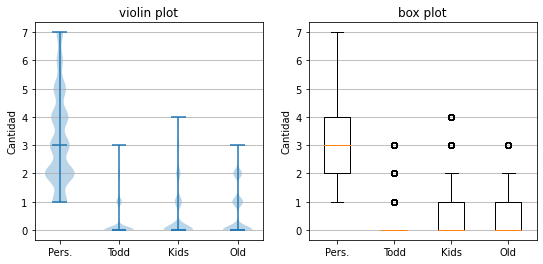

In [4]:
# selección de datos
vis =df[['numPeopleHouse', 'numToddler', 'numChildren', 'numOlder']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# gráfica de violín
axes[0].violinplot(vis,showmeans=False,showmedians=True)
axes[0].set_title('violin plot')

# diagrama de cajas
axes[1].boxplot(vis)
axes[1].set_title('box plot')

# Formato 
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(4)])
    ax.set_ylabel('Cantidad')
plt.setp(axes, xticks=[y+1 for y in range(4)],
         xticklabels=['Pers.', 'Todd', 'Kids', 'Old'])
plt.show()

### Visualización mediante gráficas univariantes

A continuación visualizaremos algunas variables categóricas

<AxesSubplot:title={'center':'Clasificación por sexo'}>

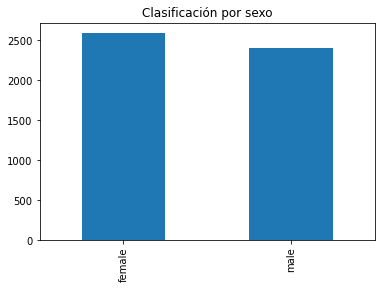

In [5]:
# participantes por género
df['gender'].value_counts().plot.bar(title="Clasificación por sexo")

Mediante esta gráfica comprobamos que hay un número similar de participantes hombres y mujeres, aunque hay un número ligeramente mayor de mujeres.

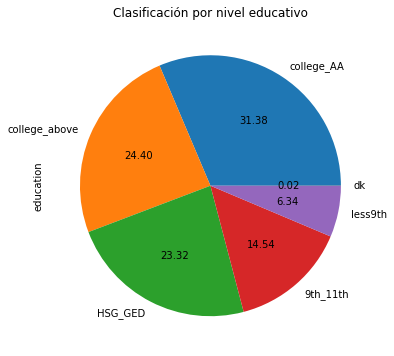

In [6]:
# participantes adultos por nivel educativo
plot = df['education'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Clasificación por nivel educativo')

La mayor parte de participantes adultos han completado los estudios universitarios, seguidos de aquellos que se quedaron en la universidad, luego los que terminaron el instituto, a continuación los que completaron de noveno a onceavo y finalmente los que hicieron menos de noveno.

<AxesSubplot:title={'center':'Clasificación por estado civil'}>

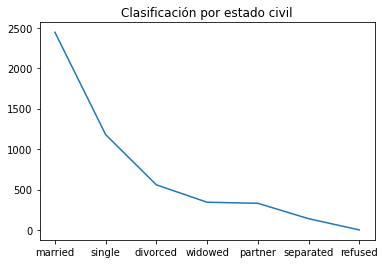

In [7]:
# participantes por estado civil
df['mStatus'].value_counts().plot.line(title="Clasificación por estado civil")

Esta gráfica nos muestra que una gran mayoría de los participantes está casado.

<AxesSubplot:title={'center':'Hábitos de tabaquismo'}>

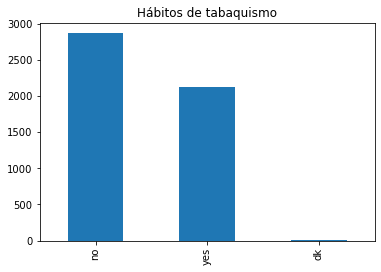

In [8]:
# hábitos de tabaquismo
df['smoke'].value_counts().plot.bar(title="Hábitos de tabaquismo")

La mayoría de los participantes no fuma.

### Visualización mediante gráficas bivariantes

A continuación, visualizaremos relaciones entre variables dos a dos:

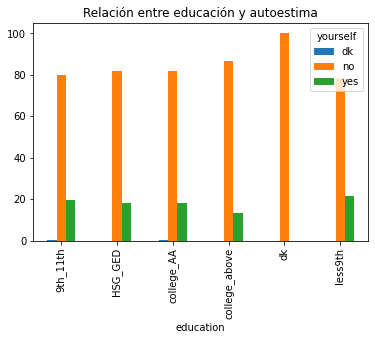

In [9]:
# gráfica de educación y autoestima
plot = pd.crosstab(index=df['education'],
            columns=df['yourself']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', title="Relación entre educación y autoestima")

En todos los niveles educativos predomina una buena autoestima, pero vemos que la falta de autoestima es ligeramente superior en el grupo de menos nivel educativo (less than 9th grade).

<AxesSubplot:title={'center':'Relación entre grado de pobreza y edad'}, xlabel='age', ylabel='poverty'>

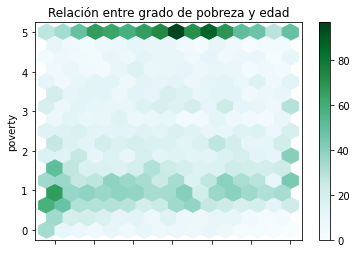

In [10]:
# gráfica de edad y pobreza
df.plot.hexbin(x='age', y='poverty', gridsize=15, title="Relación entre grado de pobreza y edad")

Se considera pobreza un rango cercano a 1 y menor. Por lo que vemos que, por norma general, son los más jóvenes los más afectados, estando los más mayores en rangos más holgados.

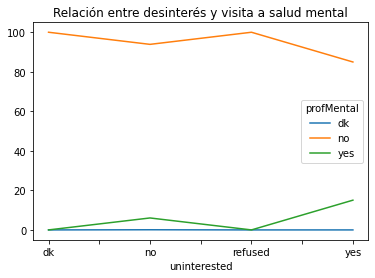

In [11]:
plot = pd.crosstab(index=df['uninterested'],
            columns=df['profMental']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='line', title="Relación entre desinterés y visita a salud mental")

Aunque es superior la cantidad de encuestados que no se ha visitado en Salud Mental, vemos que aquellos que muestran desinterés són más proclives a ello que los que no.

<AxesSubplot:title={'center':'Relación entre insomnio y cansancio'}, xlabel='sleep'>

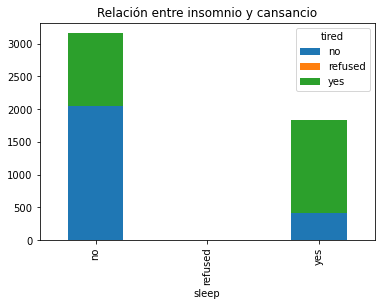

In [12]:
data_crosstab = pd.crosstab(df['sleep'], 
                            df['tired'],  
                               margins = False) 
data_crosstab.plot.bar(stacked=True, title="Relación entre insomnio y cansancio")

### Visualización multivariante

Relación entre empleo, grado de pobreza y problemas de insomnio:

<AxesSubplot:xlabel='poverty', ylabel='employed'>

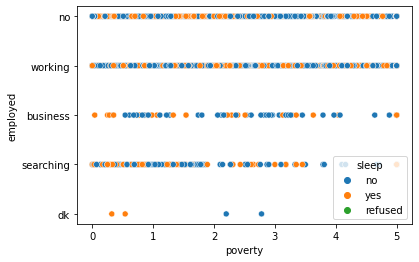

In [13]:
sns.scatterplot(data=df, x=df.poverty, y=df.employed, hue=df.sleep)

Relación entre edad, pobreza, horas de televisión y depresión:

C:\Users\claus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\claus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\claus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


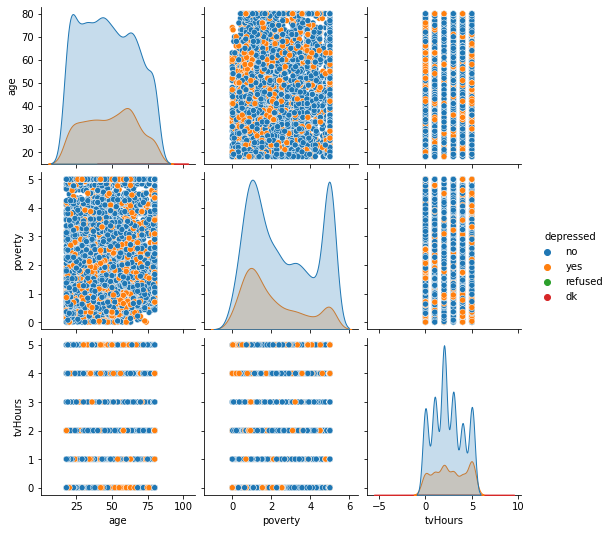

In [14]:
# selección de datos
vis =df[['age', 'poverty', 'tvHours', 'depressed']]
sns.pairplot(vis, hue='depressed')

### Correlaciones

Las gráficas de calor sirven para poder entender de forma visual cuales de las variables numéricas que componen el dataset están más directamente correlacionadas y cuales no. Así vemos en tono más claro aquellas que tienen alta relación entre sí y en tono más oscuro aquellas que no tienen relación entre sí.

Como sólo podemos ver mapas de calor entre variables numéricas, rescataremos el dataset original con las variables representadas en forma numérica y así obtener un mapa de calor con todas las variables:

In [15]:
# cargamos el dataset
df = pd.read_csv('data.csv')

In [26]:
factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((69,69)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
chi2

,gender,age,race,armed,country,mStatus,numPeopleHouse,numToddler,numChildren,numOlder,...,pcHours,insecticide,pesticide,smoke,wChange,reduction,exercice,fasting,bulimia,education
gender,0.000000,53.695175,2.823990,423.315120,1.887483,117.024016,6.120509,8.755472,6.391550,26.580526,...,3.551446,2.656885,23.874873,118.627370,193.805422,82.016753,22.181748,6.814394,1.165792,18.260379
age,53.695175,0.000000,564.163457,516.109261,254.714154,3714.477869,1500.331884,912.991245,1263.038027,3665.189892,...,546.415750,165.569035,220.337881,295.606469,612.530547,99.724873,230.989656,74.061757,49.378933,803.497561
race,2.823990,564.163457,0.000000,115.828418,2204.624399,343.680062,394.253056,138.743018,180.923693,114.533166,...,151.005440,32.209010,65.837733,162.133237,120.706927,19.727154,24.002800,20.548817,16.023891,817.103806
armed,423.315120,516.109261,115.828418,0.000000,99.991229,81.493394,95.478984,31.011979,53.274067,208.056580,...,18.105358,4.750188,38.687071,91.136674,27.910460,3.120658,8.933161,14.610721,2.425522,53.755028
country,1.887483,254.714154,2204.624399,99.991229,0.000000,1397.734529,123.645574,67.200968,62.469240,10.347357,...,46.664521,7.065287,24.819224,119.219887,25.819708,22.558708,1.918948,13.012153,0.304253,412.262155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reduction,82.016753,99.724873,19.727154,3.120658,22.558708,22.693730,17.839662,15.171223,6.153405,7.166468,...,24.409697,3.396143,3.307383,2.932020,598.259899,0.000000,949.260866,435.574538,11.239361,58.418996
exercice,22.181748,230.989656,24.002800,8.933161,1.918948,72.324783,22.543413,6.190843,23.893947,101.938577,...,65.602344,0.935837,0.817353,57.409416,583.252635,949.260866,0.000000,129.525057,12.640298,87.133788
fasting,6.814394,74.061757,20.548817,14.610721,13.012153,10.266021,10.743169,2.298086,2.979870,3.891756,...,3.444852,5.109667,3.486262,2.421517,143.630385,435.574538,129.525057,0.000000,46.614090,26.817914
bulimia,1.165792,49.378933,16.023891,2.425522,0.304253,6.099994,9.963596,2.626005,5.359529,5.260973,...,1.298790,1.178197,0.521097,0.271766,14.477135,11.239361,12.640298,46.614090,0.000000,6.035020


In [182]:
# Creamos una matriz de correlación
corr_matrix = df.corr(method='pearson')
corr_matrix

,gender,age,race,armed,country,mStatus,numPeopleHouse,numToddler,numChildren,numOlder,...,pcHours,insecticide,pesticide,smoke,wChange,reduction,exercice,fasting,bulimia,education
gender,1.000000,0.008420,-0.003603,-0.280325,0.019182,0.013431,-0.018806,0.029168,0.028200,-0.017675,...,-0.006309,0.008720,0.040869,-0.145763,-0.030319,-0.128524,-0.067045,-0.037733,-0.018227,0.015717
age,0.008420,1.000000,-0.036876,0.238558,0.018892,-0.354791,-0.374021,-0.294093,-0.232437,0.654929,...,-0.183126,0.048689,0.058104,0.159035,0.105232,-0.003010,0.169990,0.035580,0.030009,-0.022602
race,-0.003603,-0.036876,1.000000,0.004414,0.005481,-0.006303,-0.054861,-0.023802,-0.043441,-0.014053,...,0.106438,-0.006749,-0.000750,-0.017731,0.036281,0.002783,-0.001463,-0.019789,-0.008402,0.232533
armed,-0.280325,0.238558,0.004414,1.000000,-0.040389,-0.093447,-0.110661,-0.069780,-0.076898,0.184389,...,-0.005421,0.002510,0.011270,0.114695,0.063771,0.002128,0.027338,-0.013256,0.021179,0.090240
country,0.019182,0.018892,0.005481,-0.040389,1.000000,0.259640,0.044328,0.018837,0.008610,0.014715,...,-0.020104,0.011693,-0.006315,-0.056798,0.026620,0.030110,-0.003910,0.019076,-0.000817,-0.010826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reduction,-0.128524,-0.003010,0.002783,0.002128,0.030110,0.042373,0.022082,0.050851,-0.012234,0.008636,...,-0.056870,-0.022129,-0.017623,0.023731,0.130004,1.000000,0.436212,0.296064,0.050720,-0.078340
exercice,-0.067045,0.169990,-0.001463,0.027338,-0.003910,-0.024030,-0.032030,0.001608,-0.036917,0.120745,...,-0.084069,0.013636,-0.012338,0.104727,0.134537,0.436212,1.000000,0.161845,0.053525,-0.128063
fasting,-0.037733,0.035580,-0.019789,-0.013256,0.019076,-0.024110,-0.007916,-0.004933,-0.005379,0.026116,...,-0.020316,-0.008058,-0.024999,-0.018472,0.053335,0.296064,0.161845,1.000000,0.102575,-0.021981
bulimia,-0.018227,0.030009,-0.008402,0.021179,-0.000817,-0.019003,-0.024545,-0.007883,-0.019661,0.031792,...,-0.001331,0.011632,0.009719,-0.006400,0.024336,0.050720,0.053525,0.102575,1.000000,0.017915


Como el mapa es muy extenso, nos puede interesar hacer un mapa de calor sólamente de aquellas variables relacionadas con la salud mental:

<AxesSubplot:>

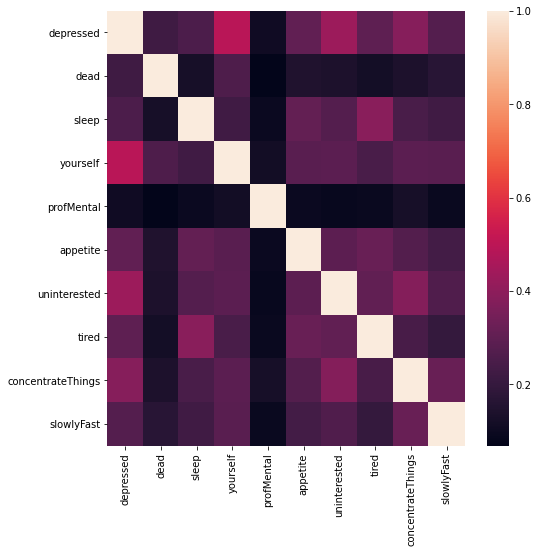

In [20]:
# seleccionamos los datos
data = df[['depressed','dead','sleep','yourself','profMental','appetite','uninterested','tired','concentrateThings','slowlyFast']]

# Creamos una matriz de correlación
corr_matrix = data.corr(method='pearson')

# dibujamos mapa de calor
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

Podemos ver correlaciones con la depresión como la autoestima, el desinterés y la concentración. Los pensamientos de muerte presentan correlación con la autoestima y la depresión. Con el insomnio la variable más correlacionada sería el cansancio y con las visitas a salud mental ninguna de las observadas.

Si nos remitimos al anterior mapa de calor, aunque es más difícil de leer podemos ver que las visitas a salud mental tienen más correlación con el estado de concentración general y la dificultad para hacer tareas diarias.